This notebook has been formatted with

https://github.com/csurfer/blackcellmagic

In [1]:
%load_ext blackcellmagic

In [2]:
import pandas as pd

from main import R_MarketMatching as rmm

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
ip_weather_data_path = '../notebooks/examples/datasets/weather.csv'
weather_df = rmm.read_data(ip_weather_data_path)
weather_df.head(2)

,Area,Date,Mean_TemperatureF
0,SFO,2014-01-01,49
1,SFO,2014-01-02,53


In [4]:
mm_only_cph = rmm.best_matches(
    data=weather_df,
    id_variable="Area",
    date_variable="Date",
    markets_to_be_matched=["CPH"],
    matching_variable="Mean_TemperatureF",
    parallel=False,
    warping_limit=1,
    dtw_emphasis=1,
    matches=5,
    start_match_period="2014-01-01",
    end_match_period="2014-10-01",
)

In [6]:
results_only_cph = rmm.inference(
    matched_markets=mm_only_cph, test_market="CPH", end_post_period="2015-10-01"
)

------------- Inputs -------------
Test Market: CPH
Control Market 0: BOS
Control Market 1: IST
Control Market 2: JFK
Control Market 3: LHR
Control Market 4: STR
Control Market 5: ZRH
prior_level_sd : 0.01
No seasonality component (controlled for by the matched markets) 
Posterior Intervals Tail Area: 95.0


2021-09-19 18:09:44.737399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.
Instructions for updating:
Do not call `graph_parents`.


2021-09-19 18:09:49.230731: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.
------------- Model Stats -------------
Matching (pre) Period MAPE: 


In [7]:
mm_only_cph["best_matches"]

,Area,BestControl,RelativeDistance,Correlation,Length,SUMTEST,SUMCNTL,RAWDIST,Correlation_of_logs,matching_start_date,matching_end_date,rank
14,CPH,ZRH,0.106374,0.901823,274.0,14308.0,14485.0,1522.0,0.901823,2014-01-01,2014-10-01,0
9,CPH,STR,0.108611,0.905298,274.0,14308.0,14733.0,1554.0,0.905298,2014-01-01,2014-10-01,1
3,CPH,LHR,0.154669,0.896006,274.0,14308.0,15304.0,2213.0,0.896006,2014-01-01,2014-10-01,2
12,CPH,BOS,0.248253,0.862522,274.0,14308.0,14611.0,3552.0,0.862522,2014-01-01,2014-10-01,3
1,CPH,JFK,0.273903,0.889211,274.0,14308.0,15360.0,3919.0,0.889211,2014-01-01,2014-10-01,4
15,CPH,IST,0.377621,0.884843,274.0,14308.0,17417.0,5403.0,0.884843,2014-01-01,2014-10-01,5


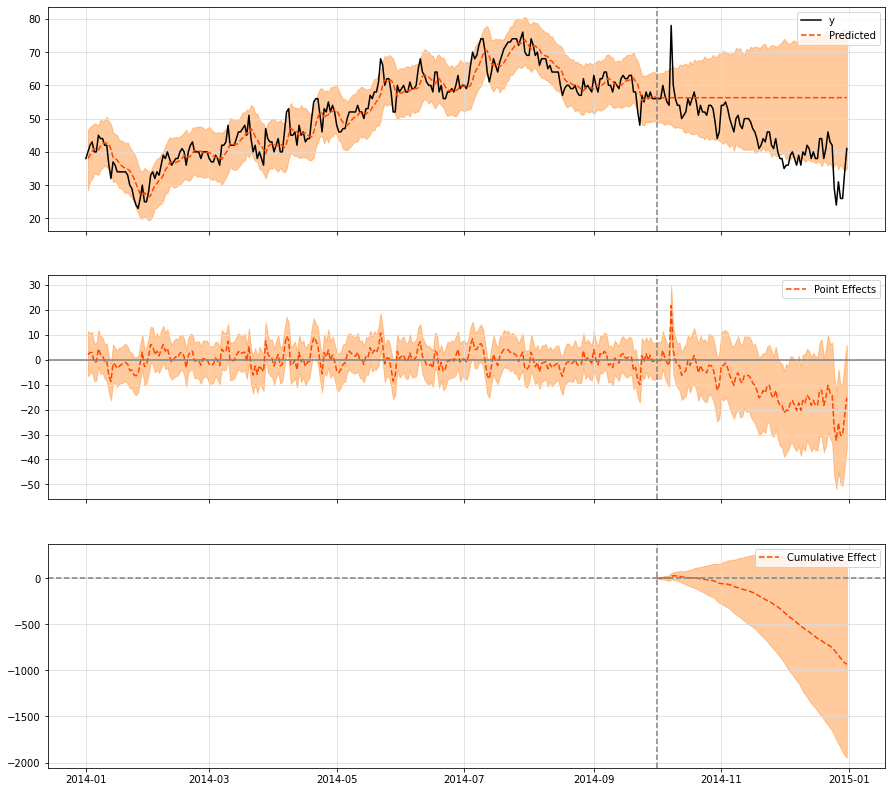

In [8]:
results_only_cph['all_output_plots'](figsize=(15, 14))